# Data Analysis using Statistical Methods: Cateogorizing the species of Iris Flowers

## Importing the libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns  
from scipy.stats import mannwhitneyu 
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from sklearn.metrics import f1_score

## Loading the dataset

In [2]:
df = pd.read_csv('/Users/vamsikasukurthi/Desktop/MA_541/Project/dataset/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df.drop('Id', axis=1, inplace=True)

In [8]:
df.replace('Iris-setosa', 0, inplace=True)
df.replace('Iris-versicolor', 1, inplace=True)
df.replace('Iris-virginica', 2, inplace=True)

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
stat, p = shapiro(df)

In [11]:
alpha = 0.05 # significance level
if p < alpha:
    print('Data is in normal distribution')
else:
    print('Data does not follow normal distribution')

Data is in normal distribution


## Finding the correlation between all the variables

In [12]:
corr_matrix = df.corr()
print(corr_matrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954   
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544   
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757   
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000   
Species             0.782561     -0.419446       0.949043      0.956464   

                Species  
SepalLengthCm  0.782561  
SepalWidthCm  -0.419446  
PetalLengthCm  0.949043  
PetalWidthCm   0.956464  
Species        1.000000  


### Correlation heatmap

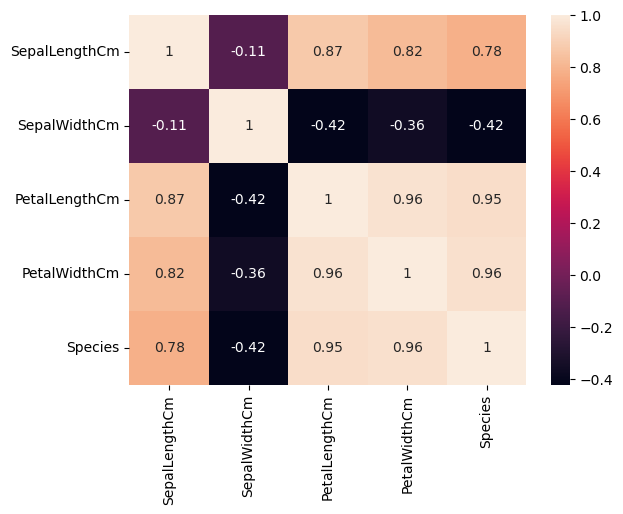

In [13]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

# NONPARAMETRIC TESTS

### Z-test

In [14]:
m_1 = df['SepalLengthCm'].mean()
m_2 = df['PetalLengthCm'].mean()
m_1, m_2

(5.843333333333335, 3.7586666666666693)

In [15]:
s_1 = df['SepalLengthCm'].std()
s_2 = df['PetalLengthCm'].std()
s_1, s_2

(0.8280661279778629, 1.7644204199522617)

In [16]:
n_1, n_2 = len(df['SepalLengthCm']), len(df['PetalLengthCm'])
n_1, n_2

(150, 150)

In [17]:
Z_value = (m_1 - m_2)/np.sqrt((s_1**2/n_1)+(s_2**2/n_2))
Z_value

13.099504494510054

In [18]:
p_value = 2 * (1 - stats.norm.cdf(abs(Z_value)))
p_value

0.0

In [19]:
alpha = 0.05
if p_value < alpha:
    print('reject H0')
else:
    print('reject H1')

reject H0


### ONE WAY ANOVA (F-TEST)

Null hypothesis(H0): Median values accross each group are equal.
    
Alternate hypothesis(H1): Not H0.

In [20]:
from scipy.stats import f_oneway
stat, p = f_oneway(df.PetalLengthCm, df.PetalWidthCm, df.SepalWidthCm, df.SepalLengthCm)

In [21]:
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=483.571, p=0.000


In [22]:
alpha = 0.05
if p<alpha:
    print('reject H0')
else:
    print('reject H1')

reject H0


### TUKEY HONEST SIGNIFICANCE TEST

In [23]:
tukey_1 = pairwise_tukeyhsd(df.PetalLengthCm, df.Species, alpha = 0.05)
tukey_1.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,2.796,0.0,2.5922,2.9998,True
0,2,4.088,0.0,3.8842,4.2918,True
1,2,1.292,0.0,1.0882,1.4958,True


In [24]:
tukey_2 = pairwise_tukeyhsd(endog =df['PetalWidthCm'], groups=df['Species'], alpha = 0.05)
tukey_2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,1.082,0.0,0.9849,1.1791,True
0,2,1.782,0.0,1.6849,1.8791,True
1,2,0.7,0.0,0.6029,0.7971,True


In [25]:
tukey_3 = pairwise_tukeyhsd(df.SepalLengthCm, df.Species, alpha = 0.05)
tukey_3.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.93,0.0,0.6862,1.1738,True
0,2,1.582,0.0,1.3382,1.8258,True
1,2,0.652,0.0,0.4082,0.8958,True


In [26]:
tukey_4 = pairwise_tukeyhsd(df.SepalWidthCm, df.Species, alpha = 0.05)
tukey_4.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.648,0.0,-0.8092,-0.4868,True
0,2,-0.444,0.0,-0.6052,-0.2828,True
1,2,0.204,0.009,0.0428,0.3652,True


## Analysis of Categorical Data

### CHI-SQUARED TEST OF INDEPENDENCE

In [27]:
cont_table = pd.crosstab(df['PetalWidthCm'], df['SepalLengthCm'])
#cont_table

In [28]:
chi_2, p, dof, expected = chi2_contingency(cont_table)

In [29]:
print('Chi-square statistic:', chi_2)
print('p-value:', '%.3f' %p)
print('dof:', dof)

Chi-square statistic: 794.2022610326181
p-value: 0.019
dof: 714


In [30]:
from scipy.stats import chi2

In [31]:
chi_2_table = chi2.ppf(q = 0.95, df = dof)
chi_2_table

777.2732792817321

In [32]:
if chi_2 > chi_2_table:
    print('reject H0:')
    print('Variables are independent')
else:
    print('reject H1:')
    print('Variables are dependent')

reject H0:
Variables are independent


## Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [34]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [36]:
model = LR()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.03623468054768068


In [40]:
R2 = r2_score(y_test, y_pred)
R2

0.9544536138367142

## Resampling Methods

In [41]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [43]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [44]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.linear_model import LinearRegression

folds = StratifiedKFold(n_splits=5)
kf = KFold(n_splits=5)

scores_kf = []
scores_skf = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    scores_kf.append(get_score(LinearRegression(), X_train, X_test, y_train, y_test))  
    
for train_index, test_index in folds.split(X, y):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    scores_skf.append(get_score(LinearRegression(), X_train, X_test, y_train, y_test))  

In [45]:
print(scores_kf)
print(scores_skf)

[0.0, 0.852159548963116, 0.0, 0.7622575890355705, 0.0]
[0.9342727662174317, 0.9395802970472574, 0.8993002494519203, 0.9028894578028899, 0.9561743525859592]


In [46]:
print(np.average(scores_kf))
print(np.average(scores_skf))

0.3228834275997373
0.9264434246210916


## Linear Model Selection and Regularization

In [47]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [48]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = lr.predict(X_test)

In [51]:
MSE = mean_squared_error(y_test, y_pred)

In [52]:
RMSE = np.sqrt(MSE)
RMSE

0.2029326740428823

In [53]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [54]:
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1)

In [55]:
y_pred_lasso = lasso_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)

In [56]:
MSE_lasso = mean_squared_error(y_test, y_pred_lasso)
RMSE_lasso = np.sqrt(MSE_lasso)
RMSE_lasso

0.2555455565419551

In [57]:
MSE_ridge = mean_squared_error(y_test, y_pred_ridge)
RMSE_ridge = np.sqrt(MSE_ridge)
RMSE_ridge

0.2030228959320554

### Forward Selection

In [58]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier as RFC

In [59]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [60]:
X = df.iloc[:, 1:5]
y = df.iloc[:, -1]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [62]:
FFS = SFS(RFC(n_jobs=-1), k_features=(1,4), forward=True, floating=False, verbose=2, scoring='accuracy', cv=5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s finished

[2023-05-07 18:22:10] Features: 1/4 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished

[2023-05-07 18:22:10] Features: 2/4 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s finished

[2023-05-07 18:22:11] Features: 3/4 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0

In [63]:
FFS.k_feature_names_

('Species',)

In [64]:
FFS.k_score_

1.0

In [65]:
pd.DataFrame.from_dict(FFS.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Species,)",0.0,0.0,0.0
2,"(0, 3)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(SepalWidthCm, Species)",0.0,0.0,0.0
3,"(0, 1, 3)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(SepalWidthCm, PetalLengthCm, Species)",0.0,0.0,0.0
4,"(0, 1, 2, 3)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(SepalWidthCm, PetalLengthCm, PetalWidthCm, Sp...",0.0,0.0,0.0


### Backward Selection

In [66]:
BFS = SFS(RFC(n_jobs=-1), k_features=(1,4), forward=False, floating=True, verbose=2, scoring='accuracy', cv=5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s finished

[2023-05-07 18:22:13] Features: 3/1 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished

[2023-05-07 18:22:13] Features: 2/1 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | el

In [67]:
BFS.k_feature_names_

('SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species')

In [68]:
BFS.k_score_

1.0

In [69]:
pd.DataFrame.from_dict(FFS.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Species,)",0.0,0.0,0.0
2,"(0, 3)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(SepalWidthCm, Species)",0.0,0.0,0.0
3,"(0, 1, 3)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(SepalWidthCm, PetalLengthCm, Species)",0.0,0.0,0.0
4,"(0, 1, 2, 3)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(SepalWidthCm, PetalLengthCm, PetalWidthCm, Sp...",0.0,0.0,0.0


## Principal Component Analysis

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [72]:
scaled_data = scaler.transform(df)
scaled_data

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00, -1.22474487e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00, -1.22474487e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00, -1.22474487e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00

In [73]:
from sklearn.decomposition import PCA

In [74]:
pca = PCA(n_components = 2)
pca.fit(scaled_data)

PCA(n_components=2)

In [75]:
x_pca = pca.transform(scaled_data)
x_pca

array([[-2.57619751,  0.4986498 ],
       [-2.41971535, -0.66051836],
       [-2.66230235, -0.32661149],
       [-2.60579016, -0.58292469],
       [-2.68308774,  0.66635432],
       [-2.40859031,  1.51304567],
       [-2.72789094,  0.06531908],
       [-2.54849187,  0.24083443],
       [-2.63679852, -1.10306194],
       [-2.5091932 , -0.45471803],
       [-2.49119358,  1.06459355],
       [-2.62767645,  0.15072358],
       [-2.53910066, -0.71553773],
       [-2.89549815, -0.94907679],
       [-2.52031495,  1.88384617],
       [-2.56869001,  2.715016  ],
       [-2.52381651,  1.507037  ],
       [-2.51080777,  0.50786266],
       [-2.25909869,  1.42774131],
       [-2.64068519,  1.14989792],
       [-2.2748965 ,  0.42706481],
       [-2.52240079,  0.94559975],
       [-3.01429621,  0.47711961],
       [-2.1878193 ,  0.10377283],
       [-2.5412568 ,  0.15523009],
       [-2.30810668, -0.61170751],
       [-2.38890582,  0.26076232],
       [-2.49339539,  0.54595848],
       [-2.46930729,

In [76]:
x_pca.shape

(150, 2)

Text(0, 0.5, 'Second principle component')

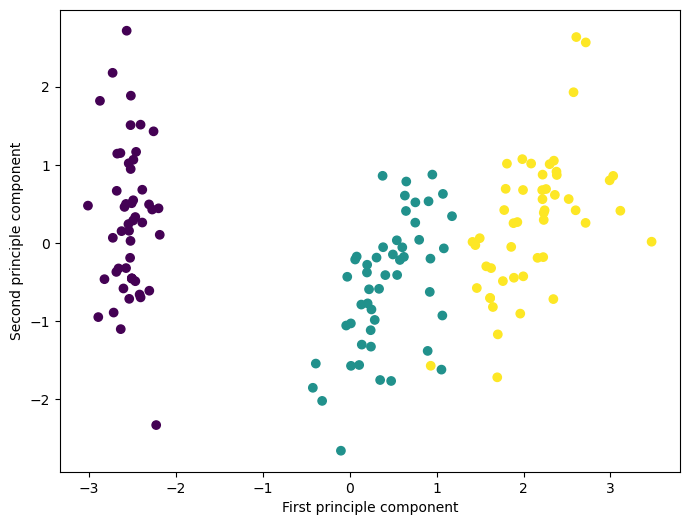

In [77]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c = df['Species'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

## Moving Beyond Linearity

In [78]:
from sklearn.preprocessing import PolynomialFeatures

In [79]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
degree = [2,3,4]
for i in degree:
    poly = PolynomialFeatures(degree=int(i))
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)
    y_pred = lin_reg.predict(X_poly_test)
    r_squared = r2_score(y_test, y_pred)
    print("R-squared for degree " + str(i) + ':' + ' ' + str(r_squared))

R-squared for degree 2: 0.927700134984149
R-squared for degree 3: 0.9038504178983079
R-squared for degree 4: -1.3962081402508932


## Multinomial Logistic Regression

In [82]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [83]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)  
classifier = LogisticRegression(random_state = 0, multi_class='multinomial', solver='lbfgs') 
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)

In [86]:
accuracy = accuracy_score(y_pred, y_test)
print('The accuracy of the logistic regression model is:', '%.3f' %(accuracy*100) + '%')

The accuracy of the logistic regression model is: 96.667%
